<a href="https://colab.research.google.com/github/himanshubachale786/HB_1st_Demo/blob/main/Copy_of_stock_price_prediction_yesbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Conext:**

Yes Bank is an Indian private sector bank, headquartered in Mumbai, catering to retail customers, MSMEs, and corporate clients. Its network is spread across 300 districts in India and comprises 1,198 branches and 1,287+ ATMs.

YES BANK has been unable to raise capital over the past few years, which has led to a steady deterioration in its financial position. This has resulted in potential loan losses, which in turn led to downgrades, which prompted investors to invoke bond covenants, and a withdrawal of deposits by customers. Over the course of the previous four quarters, the bank racked up losses and very little income. Rana Kapoor was fired as a result, and he was arrested in connection with a ₹4.66 billion money laundering case.

In July 2020, Yes Bank Ltd closed their follow-on public offer (FPO) with 95% subscription, driven by institutional investors.

As of 28 July 2020, YES BANK is an associate of State Bank of India which has a 30% stake in the company.

On 21 February 2023, YES BANK issued 2,13,650 equity shares to its employees under the company ESOP plan.

The bank plans to open 150 branches in fiscal 2024, with 110 branches open as of March 2024. It also plans to expand its range of business lines, adding affordable housing and used car loans to its luxury property mortgage and new car purchase lending segments.





**Data Importing and Cleaning**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
yesbank_stockprice =pd.read_csv('/content/data_YesBank_StockPrices.csv')
yesbank_stockprice.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Checking shape of the dataset
print (f'The shape of the dataset is : {yesbank_stockprice.shape}')

The shape of the dataset is : (185, 5)


In [ ]:
# Checking the features of the dataset
print(f'The features of the dataset are:')
list(yesbank_stockprice.columns)

The features of the dataset are:


['Date', 'Open', 'High', 'Low', 'Close']

Date: It denotes month and year of particular price.

Open: It denotes the price at which stock started trading that month.

High: High refers to the maximum price that month.

Low: Low refers to the minimum price that month.

Close: It refers to the final trading price that month, which we have to predict using regression.

In [ ]:
# Checking last 5 rows of the dataset
yesbank_stockprice.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Checking the information of the dataset
yesbank_stockprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Checking for null values
yesbank_stockprice.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

*So, there are no null values present in the dataset.*

In [ ]:
# Checking duplicates in the dataset
yesbank_stockprice.duplicated().sum()

0

*There are no duplicates in the dataset.*

In [ ]:
# Checking the discriptive statistics
yesbank_stockprice.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


*The summary statistics shows us that the average closing price is Rs.105.20, the maximum price stock has touched in day is Rs.404, the lowest opening price is Rs.10 and the highest is Rs.369, lowest price the stock has been on is Rs.5.55.*

In [ ]:
# Convert Date column into datetime formate
yesbank_stockprice['Date']= pd.to_datetime(yesbank_stockprice['Date'], format="%b-%y")

In [ ]:
# let's fetch a year form date column
yesbank_stockprice['year']= yesbank_stockprice['Date'].dt.year

In [ ]:
yesbank_stockprice.head()

,Date,Open,High,Low,Close,year
0,2005-07-01,13.00,14.00,11.25,12.46,2005
1,2005-08-01,12.58,14.88,12.55,13.42,2005
2,2005-09-01,13.48,14.87,12.27,13.30,2005
3,2005-10-01,13.20,14.47,12.40,12.99,2005
4,2005-11-01,13.35,13.88,12.88,13.41,2005


<Axes: ylabel='Close'>

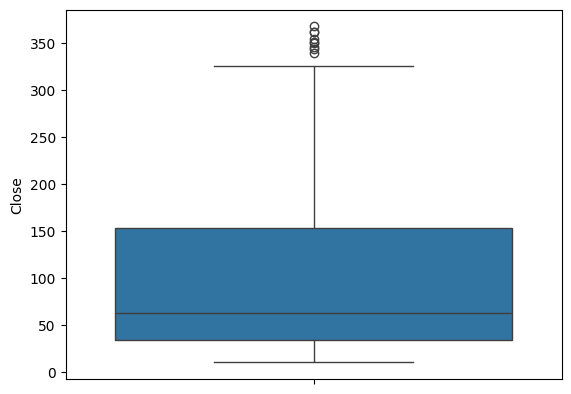

In [ ]:
# Lets check for an outliers
sns.boxplot(yesbank_stockprice['Close'])

<Axes: ylabel='Open'>

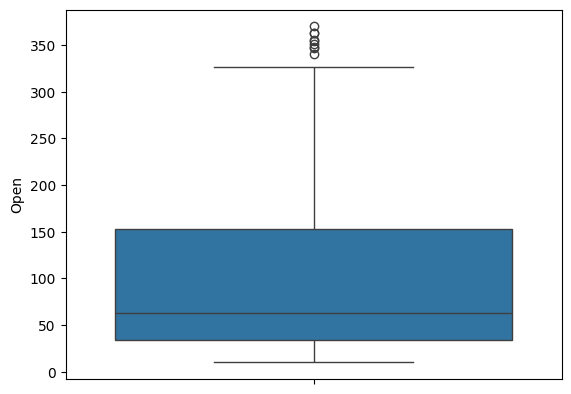

In [ ]:
sns.boxplot(yesbank_stockprice['Open'])

<Axes: ylabel='High'>

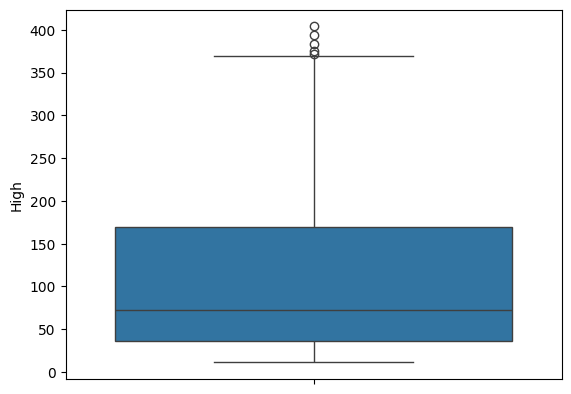

In [ ]:
sns.boxplot(yesbank_stockprice['High'])

<Axes: ylabel='Low'>

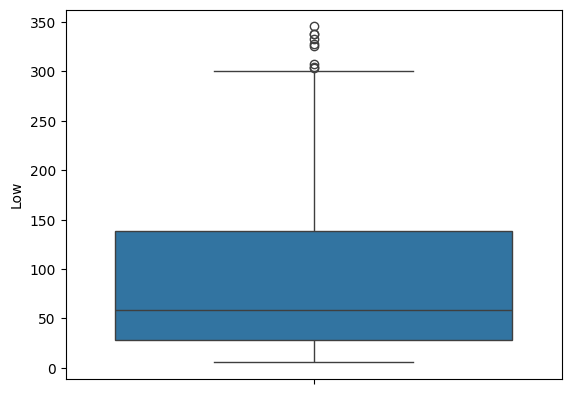

In [ ]:
sns.boxplot(yesbank_stockprice['Low'])

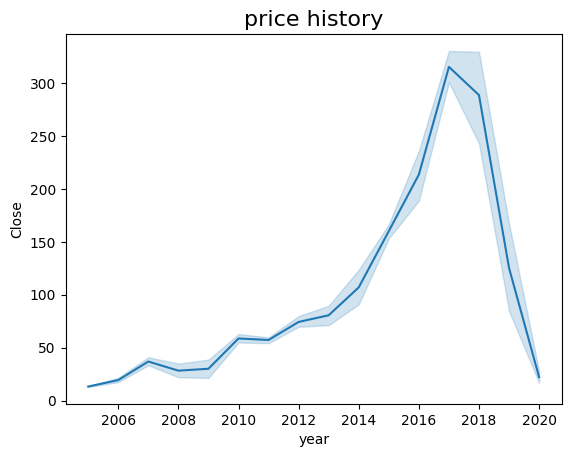

In [ ]:
# Performing EDA
sns.lineplot(x=yesbank_stockprice['year'], y=yesbank_stockprice['Close'])
plt.title('price history' , fontsize=16)
plt.show()

As seen in above plot the trend is increasing from 2010 to 2018 but after that the trend decreases.

This is because fraud case invoving Rana Kapoor

<Axes: xlabel='Close', ylabel='Density'>

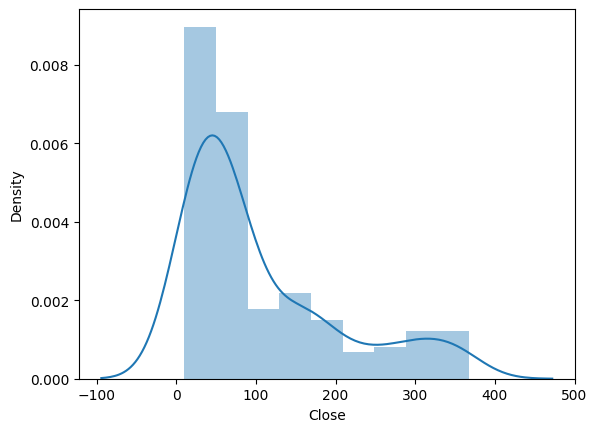

In [ ]:
# Doing Univariate analysis
#  Lets see Distribution
sns.distplot(yesbank_stockprice['Close'])

*It is Right Skewed Distribution*

*To make it Normal distribution apply log transformation.*

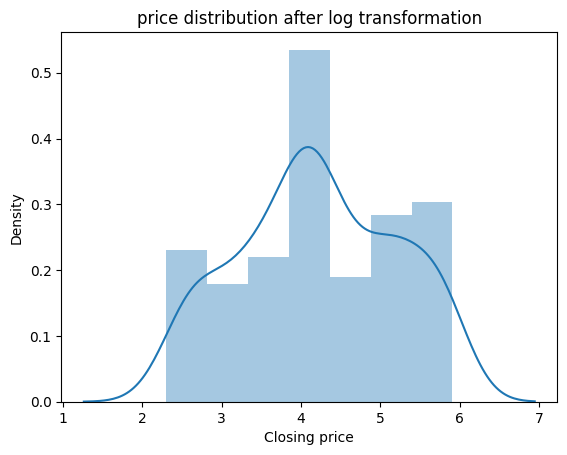

In [ ]:
# Applying Log Transformation
sns.distplot(np.log(yesbank_stockprice['Close']))
plt.title('price distribution after log transformation')
plt.xlabel('Closing price')
plt.ylabel('Density')
plt.show()


*After log transformation, Distribution of closing price is more normal.*

<Axes: xlabel='Open', ylabel='Density'>

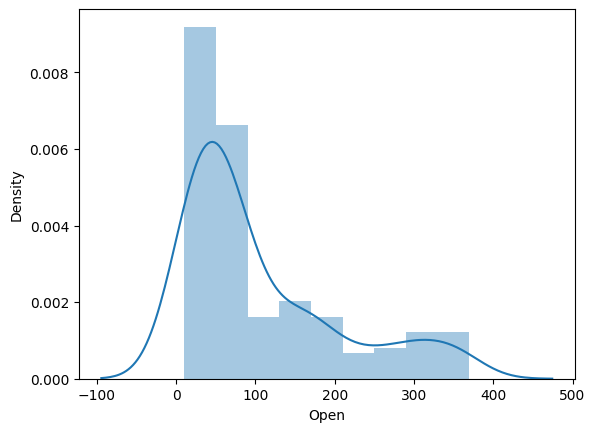

In [ ]:
#Distribution of opening price
sns.distplot(yesbank_stockprice['Open'])

It is Right Skewed Distribution

To make it Normal distribution apply log transformation.

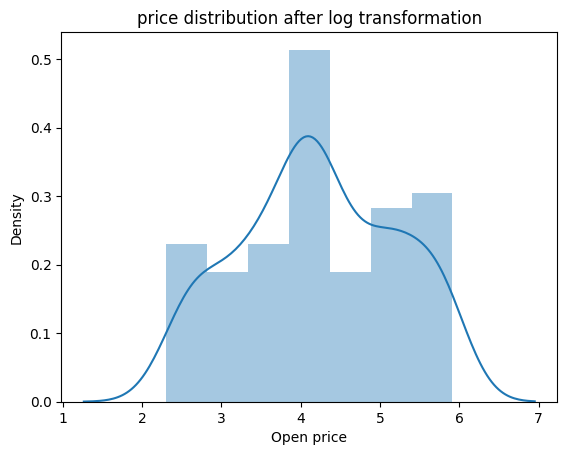

In [ ]:
# Applying Log Transformation
sns.distplot(np.log(yesbank_stockprice['Open']))
plt.title('price distribution after log transformation')
plt.xlabel('Open price')
plt.ylabel('Density')
plt.show()

After log transformation, Distribution of closing price is more normal.

<Axes: xlabel='High', ylabel='Density'>

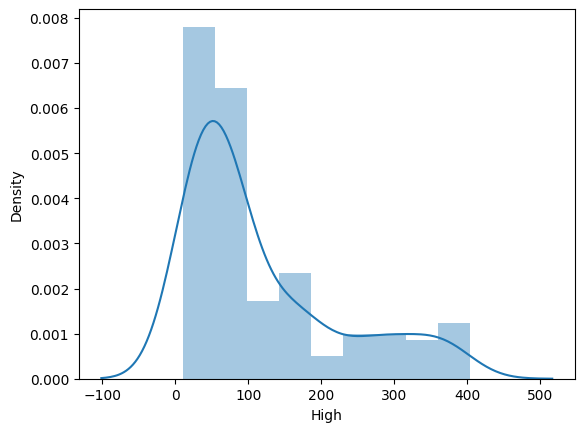

In [ ]:
#Distribution of High price
sns.distplot(yesbank_stockprice['High'])

It is Right Skewed Distribution

To make it Normal distribution apply log transformation.

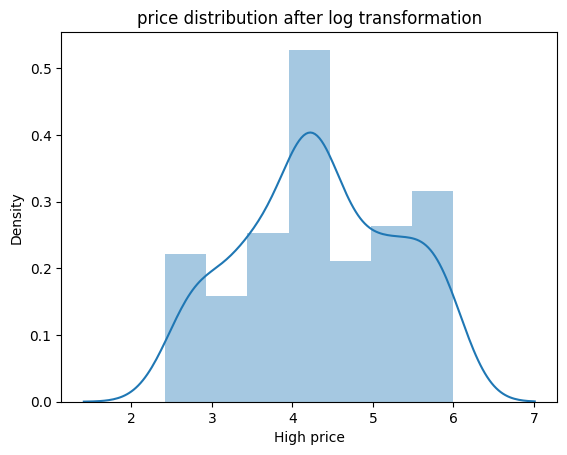

In [ ]:
# Applying Log Transformation
sns.distplot(np.log(yesbank_stockprice['High']))
plt.title('price distribution after log transformation')
plt.xlabel('High price')
plt.ylabel('Density')
plt.show()


*After log transformation, Distribution of closing price is more normal*

<Axes: xlabel='Low', ylabel='Density'>

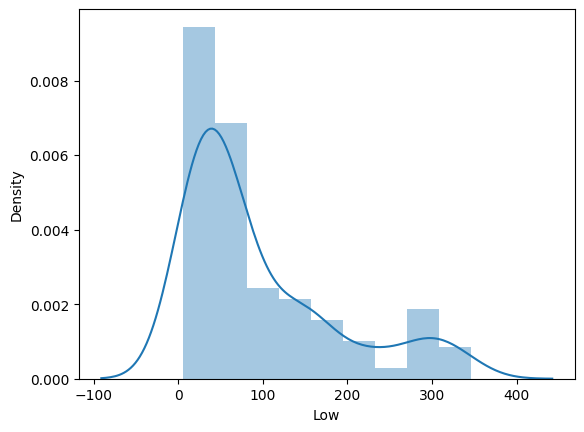

In [ ]:
#Distribution of Low price
sns.distplot(yesbank_stockprice['Low'])


It is Right Skewed Distribution

To make it Normal distribution apply log transformation

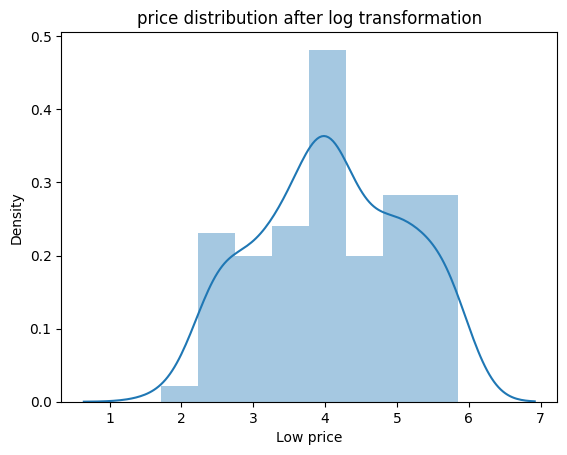

In [ ]:
# Applying Log Transformation
sns.distplot(np.log(yesbank_stockprice['Low']))
plt.title('price distribution after log transformation')
plt.xlabel('Low price')
plt.ylabel('Density')
plt.show()

After log transformation, Distribution of closing price is more normal

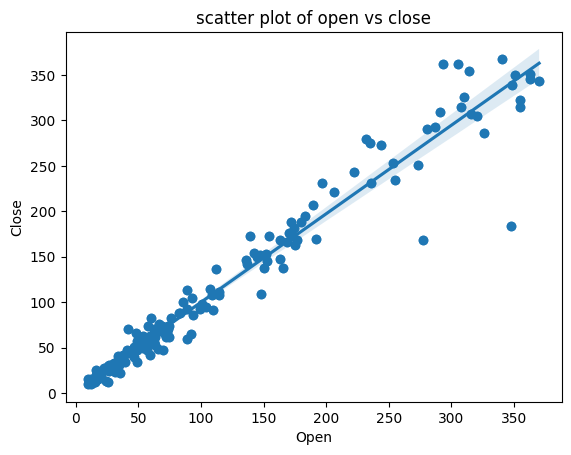

In [ ]:
# Now we will see the correlation of the features in our dataset
# Now lets find reltion between dependent and independent variables
plt.scatter(yesbank_stockprice['Open'], yesbank_stockprice['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('scatter plot of open vs close')
sns.regplot(x='Open' , y='Close' , data=yesbank_stockprice)
plt.show()

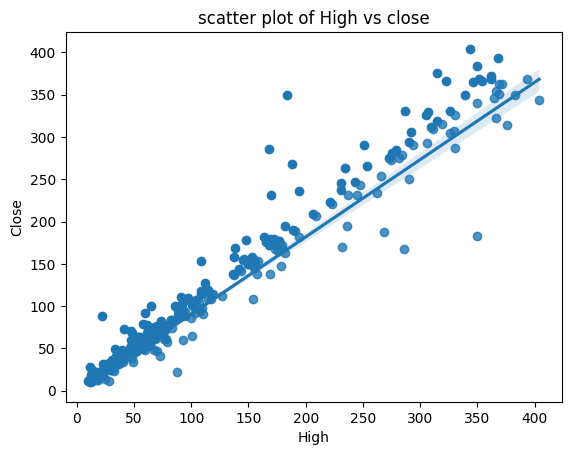

In [ ]:
plt.scatter(yesbank_stockprice['Close'], yesbank_stockprice['High'])
plt.xlabel('High')
plt.ylabel('Close')
plt.title('scatter plot of High vs close')
sns.regplot(x='High' , y='Close' , data=yesbank_stockprice)
plt.show()

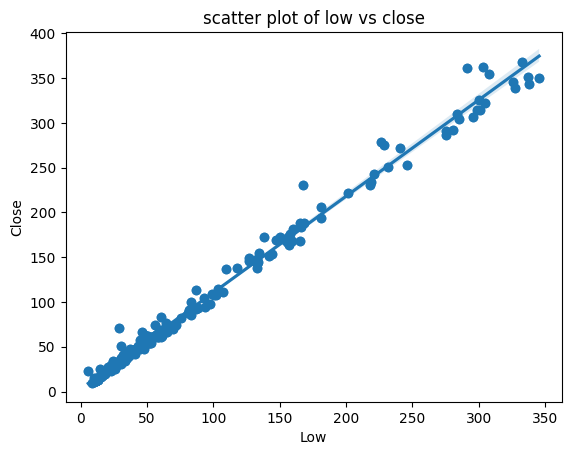

In [ ]:
plt.scatter(yesbank_stockprice['Low'], yesbank_stockprice['Close'])
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('scatter plot of low vs close')
sns.regplot(x='Low' , y='Close' , data=yesbank_stockprice)
plt.show()

*Here all variables show highest correlation*

**Train Test Split**

Splitting Data

X= Independent Variable

Y= Dependent Variable

In [ ]:
# Splitting our data into Dependent and Independent Variables
x = yesbank_stockprice.drop(columns=['Close' , 'Date' , 'year'])
y = yesbank_stockprice['Close']

In [ ]:
# splitting data into Train and Test set
# Splitting it in 80-20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Shape of the training dataset
print(f'The shape of the training dataset is : {x_train.shape}')

The shape of the training dataset is : (148, 3)


In [ ]:
# Shape of the test dataset
print(f'The shape of the test dataset is : {x_test.shape}')

The shape of the test dataset is : (37, 3)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


We build 3 regression models of our data.
1. Linear Regression
2. Lasso Regression
3. Ridge Regression

# **Linear Regression**

The most basic machine learning algorithm that can be implemented on this data is linear regression.The linear regression model returns an equation that determines the relationship between the dependent and independent variables


In [ ]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [ ]:
#train accuracy of linearr regression model
round(regressor.score(x_train , y_train), 4)

0.9961

In [ ]:
#test accuracy of linearr regression model
round(regressor.score(x_test , y_test), 4)

0.9904

In [ ]:
# Prediction of the test data
y_pred = regressor.predict(x_test)
y_pred

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

In [ ]:
np.array(y_test)

array([ 28.63,  12.24, 367.9 , 136.83, 306.8 ,  22.78,  37.93,  61.98,
       167.96,  57.5 ,  48.65, 231.2 ,  61.02,  34.55,  15.45,  25.32,
        47.31,  22.85,  66.02,  50.97, 168.  , 153.3 , 350.  ,  50.54,
        19.49, 149.38,  58.99,  30.16,  41.45, 154.57,  62.9 ,  47.32,
       168.6 , 253.52,  52.59,  49.81,  22.45])

In [ ]:
# Creating dataframe of train and test dataset
train_df = pd.DataFrame(x_train, y_train)
test_df = pd.DataFrame(y_test)
test_df.rename(columns={'Close' : 'Actual Closing Price'} , inplace = True)


In [ ]:
test_df['Pridicted Closing Price'] = y_pred
test_df.head()

,Actual Closing Price,Pridicted Closing Price
19,28.63,30.182522
42,12.24,14.692830
156,367.90,374.021906
111,136.83,127.961306
148,306.80,315.709468


In [ ]:
# Test performance of linear regression
print('Mean Absolute Error:', mean_absolute_error(y_pred , y_test))
print('Mean Squared Error:' , mean_squared_error(y_pred , y_test))
print('Root Mean Squared:' , np.sqrt(mean_squared_error(y_pred , y_test)))

Mean Absolute Error: 5.812554509942102
Mean Squared Error: 86.64379126513747
Root Mean Squared: 9.308264675283867


Text(0, 0.5, 'Predicted Closing Price')

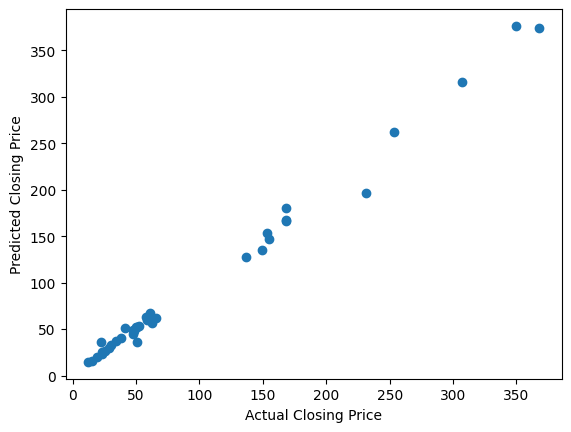

In [ ]:
# Actual price vs predicted price for linear regression plot
plt.scatter(y_test , y_pred)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')



*Ridge and Lasso regression are types of regularization techniques. Regularization techniques are used to deal with overfitting and when the dataset is large. Ridge and Lasso regression involve adding penalties to the regression function.*

# Implementing Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005 , max_iter= 1000)
lasso.fit(x_train , y_train)

Lasso(alpha=0.005)

In [ ]:
# Accuracy of lasso regression model
round(lasso.score(x_train , y_train), 4)

0.9961

In [ ]:
# Prediction of train data
y_pred_lasso= lasso.predict(x_test)

In [ ]:
y_pred_lasso

array([ 30.20892685,  14.70782563, 373.45012592, 127.67200751,
       315.80403463,  23.0653311 ,  40.00953882,  60.68562818,
       166.62558591,  63.16425668,  47.69097122, 196.68283629,
        67.03974929,  36.91726004,  15.26569489,  26.24410534,
        45.16774918,  25.36165868,  62.57069065,  52.28752189,
       181.41400381, 153.76205732, 375.85937135,  36.0918991 ,
        19.95523469, 135.30729426,  59.84570635,  32.57075518,
        51.03824857, 146.88635221,  56.84739748,  48.72123548,
       167.58156208, 262.18953105,  53.05226771,  51.68703386,
        35.57017805])

In [ ]:
np.array(y_test)

array([ 28.63,  12.24, 367.9 , 136.83, 306.8 ,  22.78,  37.93,  61.98,
       167.96,  57.5 ,  48.65, 231.2 ,  61.02,  34.55,  15.45,  25.32,
        47.31,  22.85,  66.02,  50.97, 168.  , 153.3 , 350.  ,  50.54,
        19.49, 149.38,  58.99,  30.16,  41.45, 154.57,  62.9 ,  47.32,
       168.6 , 253.52,  52.59,  49.81,  22.45])

In [ ]:
# Test performance of lasso regression
print('Mean Absolute Error:', mean_absolute_error(y_pred_lasso , y_test))
print('Mean Squared Error:' , mean_squared_error(y_pred_lasso , y_test))
print('Root Mean Squared:' , np.sqrt(mean_squared_error(y_pred_lasso, y_test)))

Mean Absolute Error: 5.801899711717019
Mean Squared Error: 86.70104624847744
Root Mean Squared: 9.311339659172434


Text(0, 0.5, 'Predicted Closing Price')

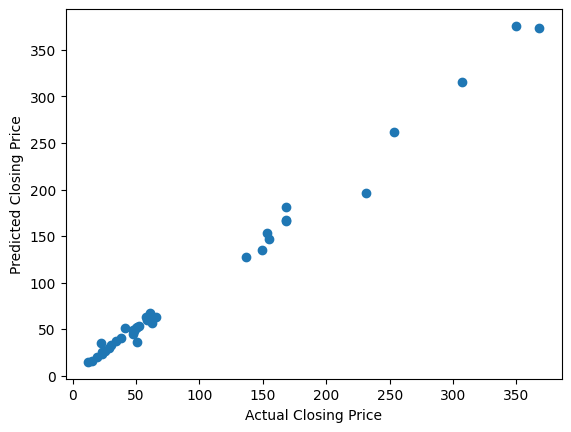

In [ ]:
# Actual price vs predicted price for lasso regression plot
plt.scatter(y_test , y_pred_lasso)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')

#Implementing Ridge Regression

In [ ]:
# fit data into ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.005 , max_iter=1000)
ridge.fit(x_train , y_train)


Ridge(alpha=0.005, max_iter=1000)

In [ ]:
# Accuracy of ridge regression model
round(ridge.score(x_train , y_train), 4)

0.9961

In [ ]:
# Prediction of train data
y_pred_ridge= ridge.predict(x_test)
y_pred_ridge


In [ ]:
np.array(y_test)

array([ 28.63,  12.24, 367.9 , 136.83, 306.8 ,  22.78,  37.93,  61.98,
       167.96,  57.5 ,  48.65, 231.2 ,  61.02,  34.55,  15.45,  25.32,
        47.31,  22.85,  66.02,  50.97, 168.  , 153.3 , 350.  ,  50.54,
        19.49, 149.38,  58.99,  30.16,  41.45, 154.57,  62.9 ,  47.32,
       168.6 , 253.52,  52.59,  49.81,  22.45])

In [ ]:
# Test performance of ridge regression
print('Mean Absolute Error:', mean_absolute_error(y_pred_ridge , y_test))
print('Mean Squared Error:' , mean_squared_error(y_pred_ridge , y_test))
print('Root Mean Squared:' , np.sqrt(mean_squared_error(y_pred_ridge , y_test)))

Mean Absolute Error: 5.7953509635084055
Mean Squared Error: 86.75988875060817
Root Mean Squared: 9.314498845918022


Text(0, 0.5, 'Predicted Closing Price')

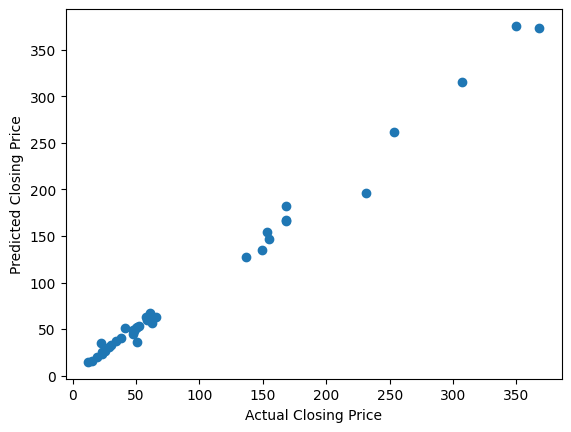

In [ ]:
# Actual price vs predicted price for ridge regression plot
plt.scatter(y_test , y_pred_ridge)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')

# Conclusion

* The popularity of stock closing is growing extreme rapidly day by day which encourage researcher to find new methods, if any fraud happens.

* This technique is used for prediction is not only helpful to researcher to predict future stock closing prices or any fraud happens or not but also help investors or any person who deling with the stock market in order to prediction of model with good accuracy.

* In this work we use linear regression technique, lasso regression, ridge regression technique. these three models give us following results

* High, Low, Open are directly correlate with the closing price of the stocks.

* Target variable (dependent variable) strongly dependent on independent variables.